# Laboratorio 5ABC Aprendizaje estadistico

Por: Nicolas Osorno Roa

In [1]:
# 1.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
# 2.

df.info()
df.describe()
df.isnull().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [3]:
# 3.

val_op = df["ocean_proximity"].unique()
val_op

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
# 4.

df1 = df[["housing_median_age",   "total_rooms",  "total_bedrooms",   "population",   "households",   "median_income",    "median_house_value","ocean_proximity"]]
media_op = df1.groupby('ocean_proximity').mean()
media_op

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


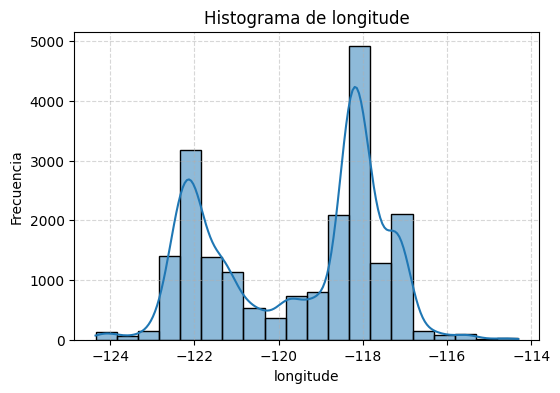

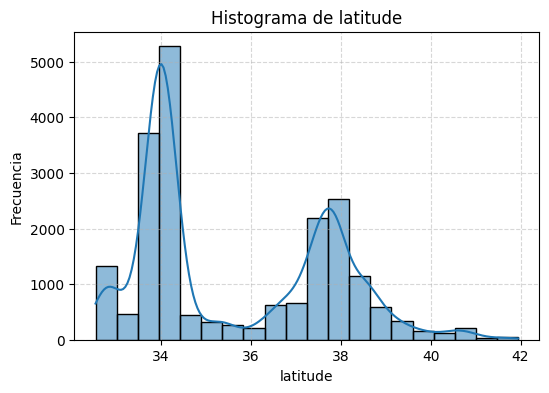

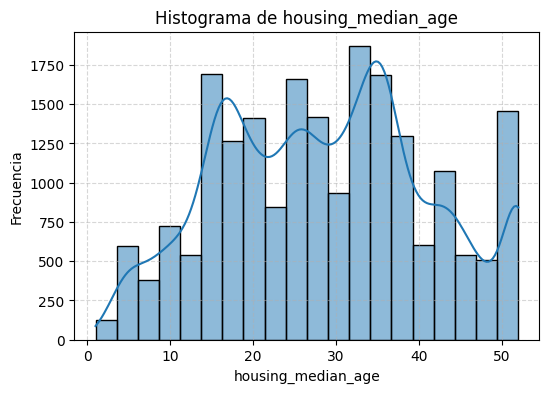

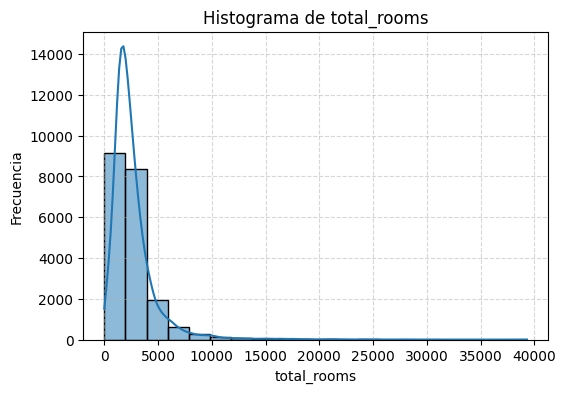

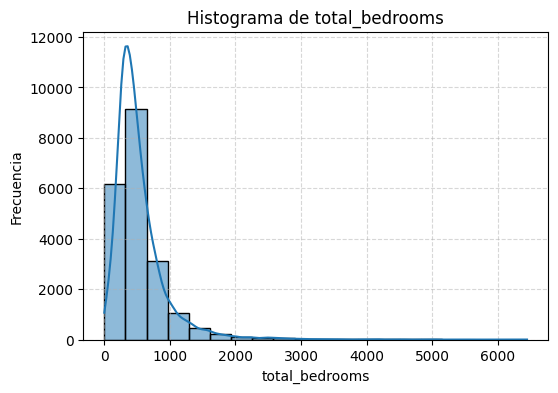

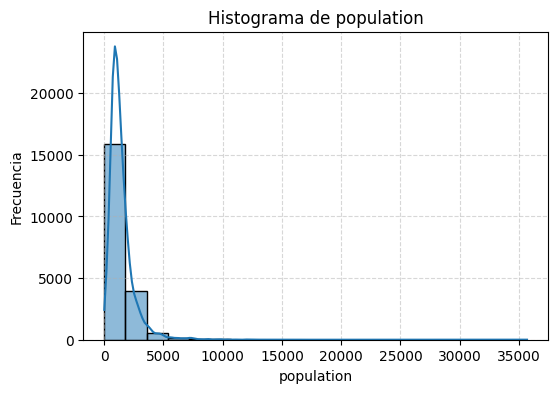

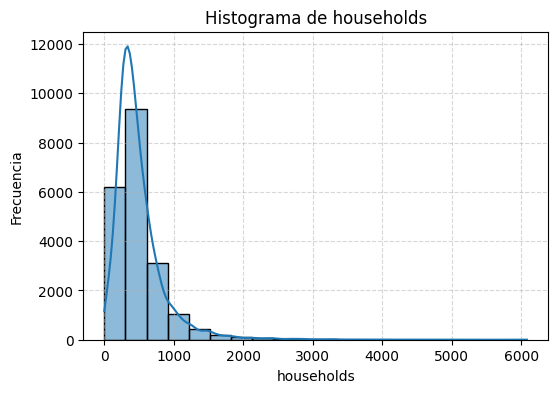

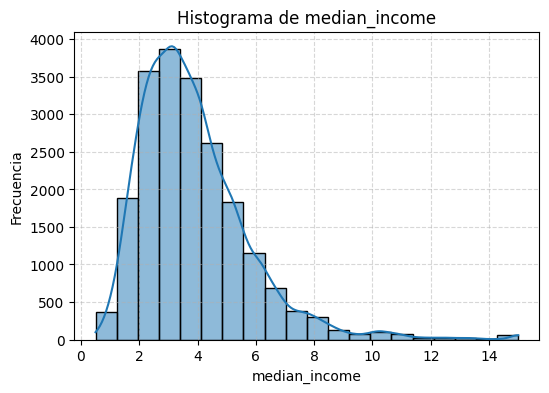

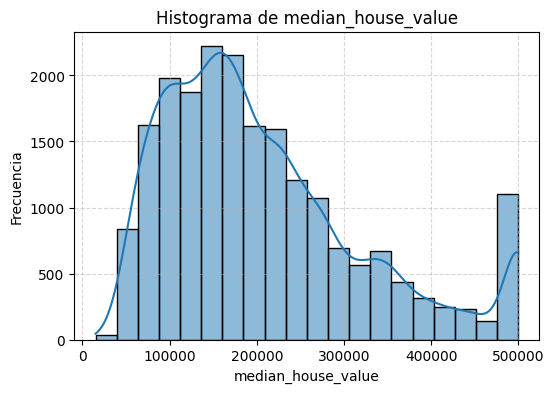

In [5]:
# 5.

for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

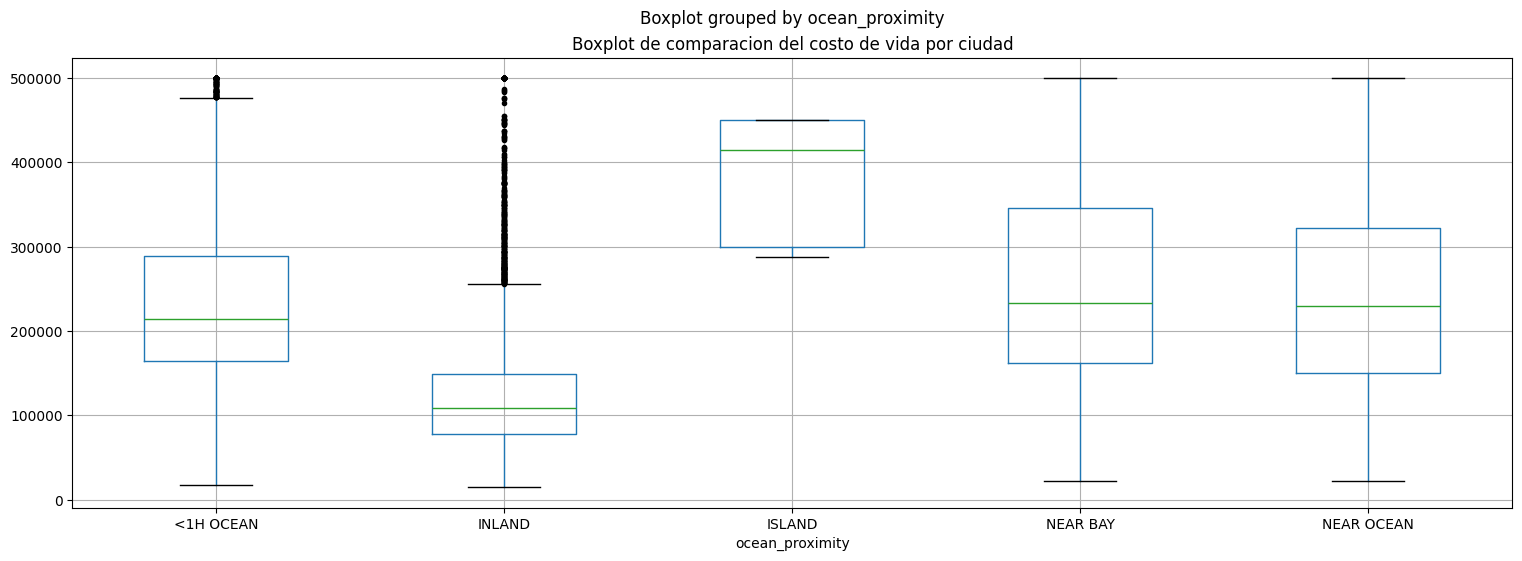

In [6]:
# 7.
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))

plt.title('Boxplot de comparacion del costo de vida por ciudad')
plt.show()

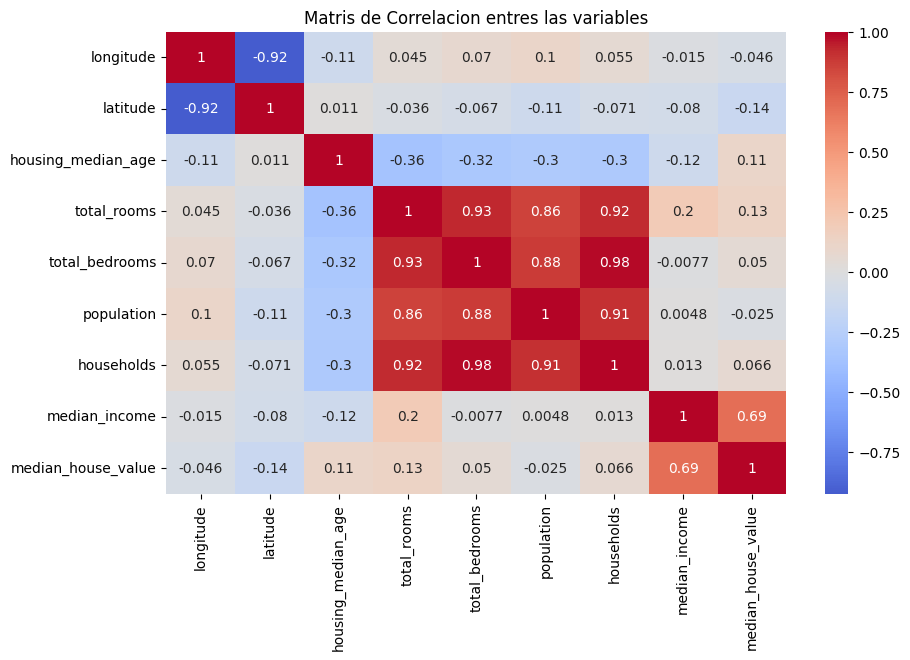

In [7]:
# 8.

corr_matrix = df.select_dtypes(include=np.number).corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)

plt.title('Matris de Correlacion entres las variables')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


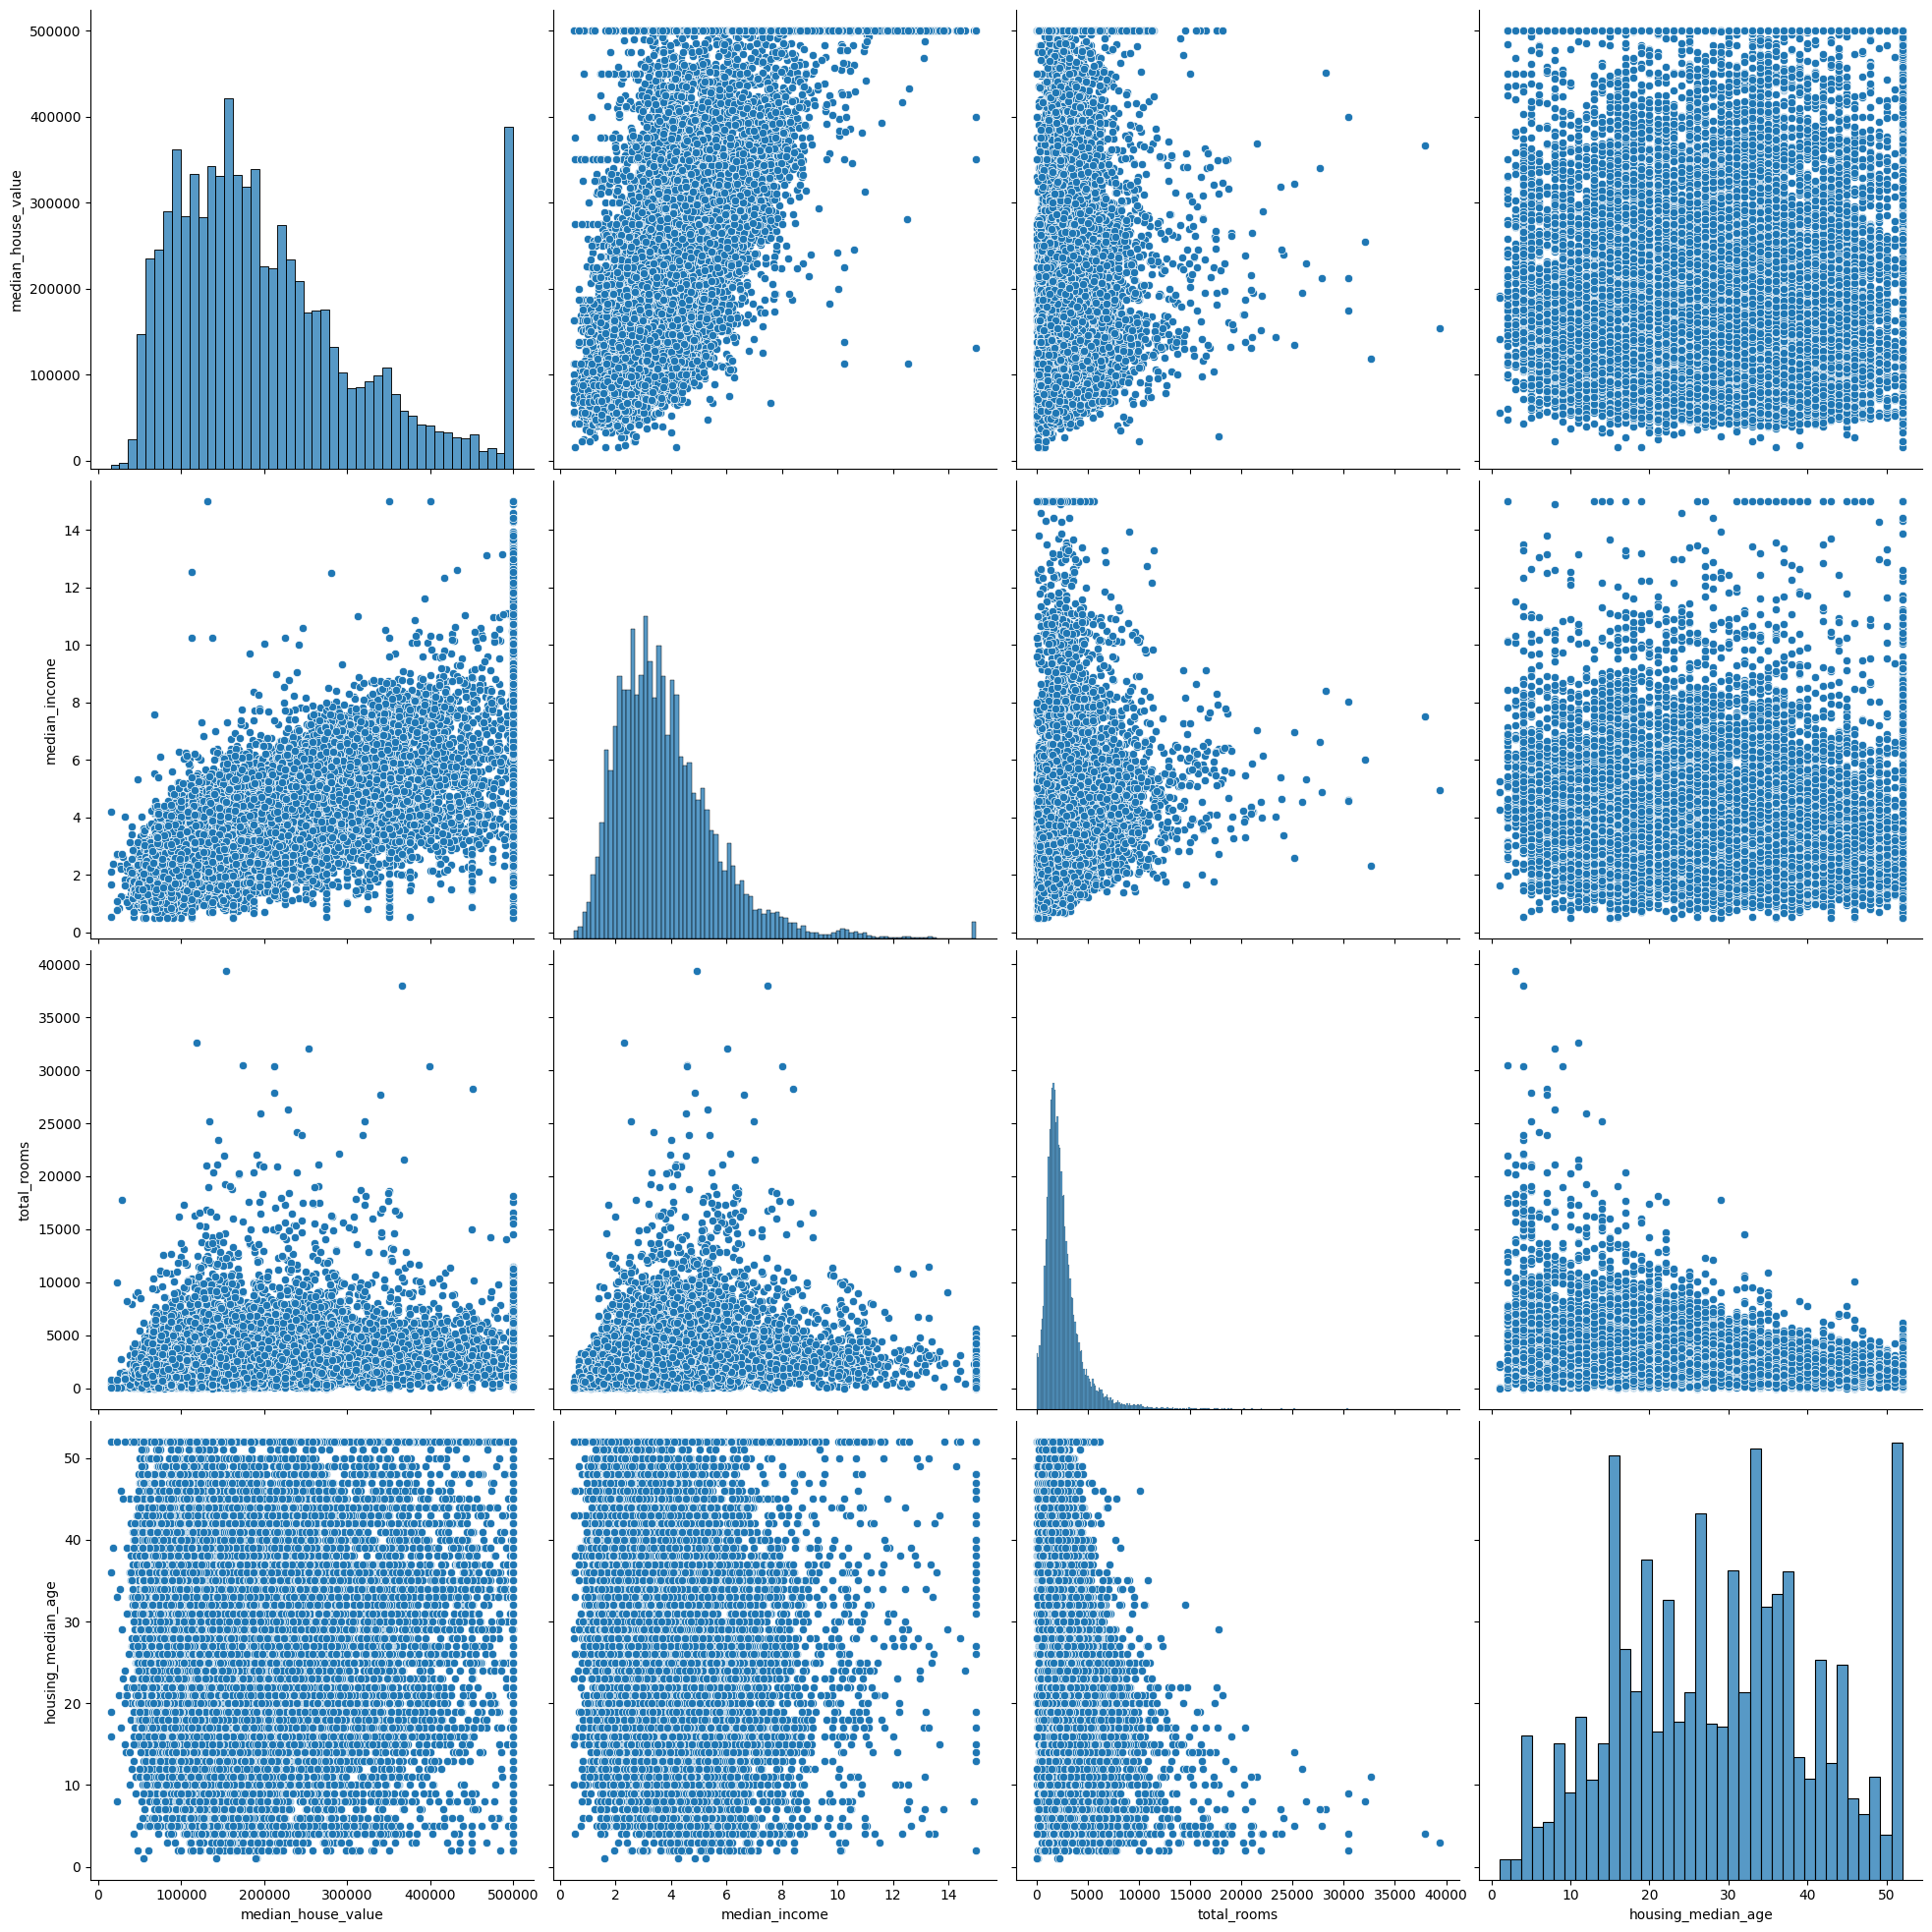

In [8]:
# 9.

df2 = df[["median_house_value", "median_income", "total_rooms","housing_median_age"]]
sns.pairplot(df2,size=5)
plt.show()

Text(0.5, 1.0, 'Relación entre ingreso medio y edad media de las viviendas,caracterizado por el valor medio de la vivienda')

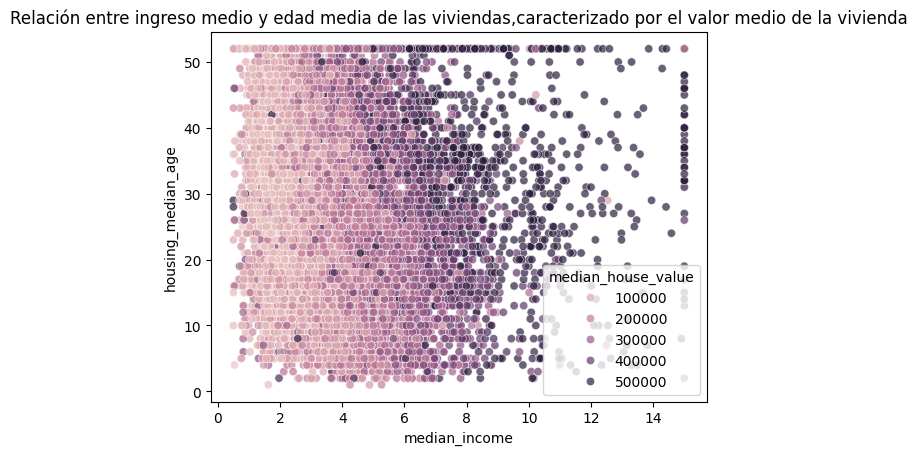

In [9]:
#10.

sns.scatterplot(data=df,x="median_income",y="housing_median_age",hue="median_house_value", alpha=0.7)

plt.title("Relación entre ingreso medio y edad media de las viviendas,caracterizado por el valor medio de la vivienda")

In [10]:
# 11.

from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

# Esta forma de dividir los datos, separandolo en gurpos de forma aleatoria no es del todo forma mas adecuada de dividir
# los datos, ya que se puede prestar para Sampling bias, en donde un subconjunto de los datos puede estar sobre o sub representado en
# alguno de los dos grupos, por lo cual en principio no se puede garantizar que estos sean representativos de la muestra original.

16512
4128


In [11]:
# 12.

from sklearn.model_selection import StratifiedShuffleSplit

df["income_cat"] = pd.cut(df["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.iloc[train_index]
  strat_test_set = df.iloc[test_index]

df_train, test_set = train_test_split(df, test_size = 0.2, random_state = 7)

pd.DataFrame({'Muestra original': df["income_cat"].value_counts() / len(df),
              'TrainSetRandom':df_train["income_cat"].value_counts() / len(df_train),
              'TestSetRandom':test_set["income_cat"].value_counts() / len(test_set),
              'TrainSetStrat':strat_train_set["income_cat"].value_counts() / len(strat_train_set),
              'TestSetStrat':strat_test_set["income_cat"].value_counts() / len(strat_test_set)
              })

# En el codigo anterior se dividio la muetra original en los conjuntos de train y test de dos maneras diferentes, la primera es de forma aleatoria,
# la segunda es estratificada, es decir se agruparon los datos en 5 grupos con la caracteristica "median_income", luego mateniendo la proporcion
# de cada grupo en la muetra original se dividieron en los conjuntos test y train. a simple vista de la tabla comparativa de los porcentajes de cada
# grupo en los conjuntos podemos ver que el metodo de division estratificada mantiene al menos las primeras 3 cifras de la muestra, mientras que
# el metodo aleatorio solo mantiene al menos hasta la primera, lo que los habla que la division por el metodo estratificado genera grupos mas representativos
# de la muetra original que el metodo aleatorio (la diferencia se notaria mas si los datos fueran menos),a continuacion analisamos esto de forma mas cuantitativa

,Muestra original,TrainSetRandom,TestSetRandom,TrainSetStrat,TestSetStrat
income_cat,,,,,
3,0.350581,0.348716,0.358043,0.350594,0.350533
2,0.318847,0.324188,0.297481,0.318859,0.318798
4,0.176308,0.173147,0.188953,0.176296,0.176357
5,0.114438,0.114159,0.115552,0.114462,0.114341
1,0.039826,0.039789,0.039971,0.039789,0.039971


In [12]:
# 12.

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] = abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
compare_props

# En efecto como se habia adelandado, notamos de la tabla podemos ver que el metodo de division aleatorio tiene errores porcentuales, mucho mayores
# que el metodo de division estratificada.

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.039971,0.364964,0.364964
2,0.318847,0.318798,0.297481,6.701109,0.015195
3,0.350581,0.350533,0.358043,2.128248,0.013820
4,0.176308,0.176357,0.188953,7.172300,0.027480
5,0.114438,0.114341,0.115552,0.973751,0.084674


In [13]:
#13

df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17142,-122.18,37.45,43.0,2061.0,437.0,817.0,385.0,4.4688,460200.0,NEAR BAY,3,5.353247,0.212033,2.122078
5460,-118.47,34.00,37.0,2586.0,765.0,1801.0,737.0,2.6042,305800.0,<1H OCEAN,2,3.508820,0.295824,2.443691
7920,-118.07,33.86,28.0,1789.0,352.0,1347.0,330.0,3.4250,189700.0,<1H OCEAN,3,5.421212,0.196758,4.081818
15846,-122.43,37.75,40.0,4850.0,977.0,1824.0,952.0,5.0519,356100.0,NEAR BAY,4,5.094538,0.201443,1.915966
18194,-122.02,37.38,32.0,1889.0,487.0,1321.0,508.0,3.2574,254400.0,<1H OCEAN,3,3.718504,0.257808,2.600394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,INLAND,2,5.523985,0.206413,2.904059
919,-121.96,37.51,22.0,5811.0,1125.0,3215.0,1086.0,4.4107,223500.0,<1H OCEAN,3,5.350829,0.193598,2.960405
5699,-118.26,34.24,42.0,890.0,179.0,555.0,200.0,4.4821,271900.0,<1H OCEAN,3,4.450000,0.201124,2.775000
10742,-117.91,33.61,38.0,1232.0,178.0,410.0,171.0,11.0750,500001.0,<1H OCEAN,5,7.204678,0.144481,2.397661


In [14]:
# 14.

from sklearn.impute import SimpleImputer


df_train_num = df_train.drop(["ocean_proximity","income_cat"],axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

mean_values = pd.Series(imp_mean.statistics_, index=df_train_num.columns, name=" Variable 1 (imp_mean.statistics_)")
median_values = pd.Series(df_train_num.median().values, index=df_train_num.columns, name="Variable 2 (f_train_num.median())")

comparison = pd.concat([mean_values, median_values ], axis=1)

comparison

# La variable 1 es la Media De cada columna y la variable 2 es la mediana

,Variable 1 (imp_mean.statistics_),Variable 2 (f_train_num.median())
longitude,-119.574444,-118.500000
latitude,35.641143,34.260000
housing_median_age,28.628634,29.000000
total_rooms,2630.662003,2125.000000
total_bedrooms,538.473037,436.000000
population,1426.180111,1166.000000
households,499.831093,410.000000
median_income,3.855661,3.516950
median_house_value,205894.935138,178700.000000
rooms_per_household,5.430811,5.218348


In [15]:
# 14.

X = imp_mean.transform(df_train_num)                      # Metodo para reeemplzar volores nulos por la media de la columna
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

housing_tr


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.18,37.45,43.0,2061.0,437.0,817.0,385.0,4.4688,460200.0,5.353247,0.212033,2.122078
1,-118.47,34.00,37.0,2586.0,765.0,1801.0,737.0,2.6042,305800.0,3.508820,0.295824,2.443691
2,-118.07,33.86,28.0,1789.0,352.0,1347.0,330.0,3.4250,189700.0,5.421212,0.196758,4.081818
3,-122.43,37.75,40.0,4850.0,977.0,1824.0,952.0,5.0519,356100.0,5.094538,0.201443,1.915966
4,-122.02,37.38,32.0,1889.0,487.0,1321.0,508.0,3.2574,254400.0,3.718504,0.257808,2.600394
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0,5.523985,0.206413,2.904059
16508,-121.96,37.51,22.0,5811.0,1125.0,3215.0,1086.0,4.4107,223500.0,5.350829,0.193598,2.960405
16509,-118.26,34.24,42.0,890.0,179.0,555.0,200.0,4.4821,271900.0,4.450000,0.201124,2.775000
16510,-117.91,33.61,38.0,1232.0,178.0,410.0,171.0,11.0750,500001.0,7.204678,0.144481,2.397661


In [16]:
# 15.

from sklearn.preprocessing import OneHotEncoder

df_train["ocean_proximity"].unique()          #Crea un array con los valores unicos de la columna "ocean_proximity"
housing_cat=df_train[["ocean_proximity"]]     # crae un datafrane solo con la columna de "ocean_proximity"

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)   # Array de ceros y unos, donde cada columna representa un elemento unico de "ocean_proximity", y  cada fila
                                                          # es un dato, hay un uno en cada fila (dato), la columna en el que esta es la categoria de "ocean_proximity"
                                                          # a la que pertenece

print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])  # data frame de "housing_cat_1hot"

housing_tr_ = housing_tr.join(df_cat_1hot)  # une el dataframe de las catagorias "housing_cat_1hot" al dataframe con todos los datos numericos

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [17]:
# 16.

cols=["longitude", "latitude",  "housing_median_age",   "total_rooms",\
      "total_bedrooms", "population",   "households",   "median_income",\
      "<1H OCEAN",  "INLAND",   "ISLAND",   "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.216135,0.521785,0.823529,0.052271,0.067660,0.022815,0.063148,0.273713,0.0,0.0,0.0,1.0,0.0
1,0.585657,0.155154,0.705882,0.065625,0.118560,0.050394,0.121033,0.145122,1.0,0.0,0.0,0.0,0.0
2,0.625498,0.140276,0.529412,0.045353,0.054469,0.037669,0.054103,0.201728,1.0,0.0,0.0,0.0,0.0
3,0.191235,0.553666,0.764706,0.123213,0.151459,0.051038,0.156389,0.313927,0.0,0.0,0.0,1.0,0.0
4,0.232072,0.514346,0.607843,0.047896,0.075419,0.036940,0.083374,0.190170,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.971116,0.243358,0.882353,0.037925,0.047796,0.021974,0.044401,0.116612,0.0,1.0,0.0,0.0,0.0
16508,0.238048,0.528162,0.411765,0.147657,0.174426,0.090025,0.178425,0.269707,1.0,0.0,0.0,0.0,0.0
16509,0.606574,0.180659,0.803922,0.022486,0.027623,0.015471,0.032725,0.274631,1.0,0.0,0.0,0.0,0.0
16510,0.641434,0.113709,0.725490,0.031185,0.027467,0.011407,0.027956,0.729307,1.0,0.0,0.0,0.0,0.0


In [18]:
# 17. Limpieza


df2 = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')  # importar datos


df2_num = df2.drop("ocean_proximity", axis=1)         # Dataframe con columnas unicamente numericas

imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df2_num)

df_clean = pd.DataFrame(imp_mean.transform(df2_num), columns = df2_num.columns )  # Cambiamos los valores nulos de las columnas por la media de la columna

df_clean.isnull().sum()                               # df_clean dataframe sin valores numericos nulos



,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [19]:
# 17. escalamiento variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_clean)

df_scal = pd.DataFrame(scaler.transform(df_clean), columns = df_clean.columns)

df_scal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713


In [20]:
# 17. Manejo atributos categoricos

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)
# Parte del dataframe categorica transformada en descripsion numerica

df_cat =  pd.DataFrame(cat_encoder.fit_transform(df2[["ocean_proximity"]]), columns=cat_encoder.categories_[0])


housing_data =  df_scal.join(df_cat) # Dataframe listo para analisis
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.0,1.0,0.0,0.0,0.0
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.0,1.0,0.0,0.0,0.0
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.0,1.0,0.0,0.0,0.0
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.0,1.0,0.0,0.0,0.0


In [21]:
# 17. Division en train y test set usando estratificacion por "median_income"

housing_data["income_cat"] = pd.cut(housing_data["median_income"],bins=[0., 0.25, 0.5, 0.75,1.],labels=[1, 2, 3, 4], include_lowest=True )


split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
  housing_train = housing_data.iloc[train_index]
  housing_test = housing_data.iloc[test_index]

housing_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
14130,0.723108,0.023379,0.176471,0.048833,0.089385,0.044620,0.089459,0.070406,0.214022,0.0,0.0,0.0,0.0,1.0,1
18341,0.220120,0.519660,1.000000,0.033700,0.029330,0.013005,0.030916,0.833802,1.000000,0.0,0.0,0.0,1.0,0.0,4
19721,0.243028,0.701382,0.862745,0.021441,0.023898,0.009529,0.022200,0.112074,0.096909,0.0,1.0,0.0,0.0,0.0,1
17566,0.243028,0.507970,0.803922,0.027087,0.039572,0.016957,0.045881,0.173080,0.341856,1.0,0.0,0.0,0.0,0.0,1
7595,0.607570,0.144527,0.725490,0.030495,0.034451,0.020460,0.033712,0.198652,0.187218,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17338,0.388446,0.247609,0.058824,0.038939,0.034140,0.015191,0.031245,0.487559,0.646804,1.0,0.0,0.0,0.0,0.0,2
4739,0.594622,0.160468,0.764706,0.059769,0.092644,0.031671,0.092419,0.188832,0.561855,1.0,0.0,0.0,0.0,0.0,1
4672,0.603586,0.160468,0.588235,0.071621,0.194134,0.115558,0.197172,0.107109,0.441650,1.0,0.0,0.0,0.0,0.0,1
5033,0.599602,0.153029,0.607843,0.045323,0.075729,0.041173,0.078112,0.079158,0.193610,1.0,0.0,0.0,0.0,0.0,1


In [22]:
# 18. Empleo modelo de regresion lineal

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

x_train = housing_train.drop(['income_cat'], axis = 1)
y_train = housing_train['income_cat']

model.fit(x_train, y_train)

y_pred = model.predict(housing_test.drop(['income_cat'], axis = 1))

score = accuracy_score(housing_test['income_cat'], y_pred)

print("score (coeficiente de determinacion):",score)


score (coeficiente de determinacion): 0.9593023255813954


19. en principio podemos ver que la regrecion lineal funciono bien con los datos de test, el score dio un puntaje muy cercano a 1, el modelo es bueno clasificando el ingreso del propietario en los rengos de clasificacion establecidos en la columna "income_cat", dadas las caracteristicas de las casa que hay en el dataset.

20. Es score nos da el porsentaje de la variabilidad en el precio de las casas que se puede predecir a travez del modelo, en este caso dio de un 96% es decir que modelo explica casi en su totalidad la variabilidad de los datos (siendo 100% capturar en su totalidad esta variabilidad)

21. se puede ajustar a otro modelo, pero procurando mejores resultados que el actual.



In [26]:
# 22.

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

housing_data = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')

housing_data["income_cat"] = pd.cut(
    housing_data["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    housing_train = housing_data.iloc[train_index]
    housing_test = housing_data.iloc[test_index]

X_train = housing_train.drop(["income_cat"], axis=1)
y_train = housing_train["income_cat"]

X_test = housing_test.drop(["income_cat"], axis=1)
y_test = housing_test["income_cat"]

num_cols = X_train.select_dtypes(include=[np.number]).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([('num', Pipeline([
('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


pipeline = Pipeline([('preprocessor', preprocessor),('model', LogisticRegression(max_iter=1000))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {acc:.3f}")

Exactitud del modelo: 0.986
